 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [30]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

whale_returns_path = Path("./Resources/whale_returns.csv")
algo_returns_path = Path("./Resources/algo_returns.csv")
sp_tsx_history_path = Path("./Resources/sp_tsx_history.csv")

whale_returns = pd.read_csv(whale_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns = pd.read_csv(algo_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_history = pd.read_csv(sp_tsx_history_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [31]:
# Reading whale returns
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [32]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [33]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [34]:
# Reading algorithmic returns
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [35]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [36]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [37]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [38]:
# Check Data Types
sp_tsx_history.info(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [39]:
# Fix Data Types 
# Fixing object datatype on column to float, requires dropping , and $
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",","", regex=True) 
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$","", regex=True)
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype('float')
sp_tsx_history.dtypes
sp_tsx_history.head()



,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [40]:
# Calculate Daily Returns
sp_tsx_dailyreturns = sp_tsx_history.pct_change()
sp_tsx_dailyreturns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [41]:
# Drop nulls
sp_tsx_dailyreturns = sp_tsx_dailyreturns.dropna().copy()
sp_tsx_dailyreturns.isnull().sum()

Close    0
dtype: int64

In [42]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_dailyreturns = sp_tsx_dailyreturns.rename(columns={"Close": "TX60_Daily_returns"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [43]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat(
    [whale_returns, algo_returns, sp_tsx_dailyreturns], axis="columns", join="inner"
)
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TX60_Daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

Text(0, 0.5, 'Daily retursn (%)')

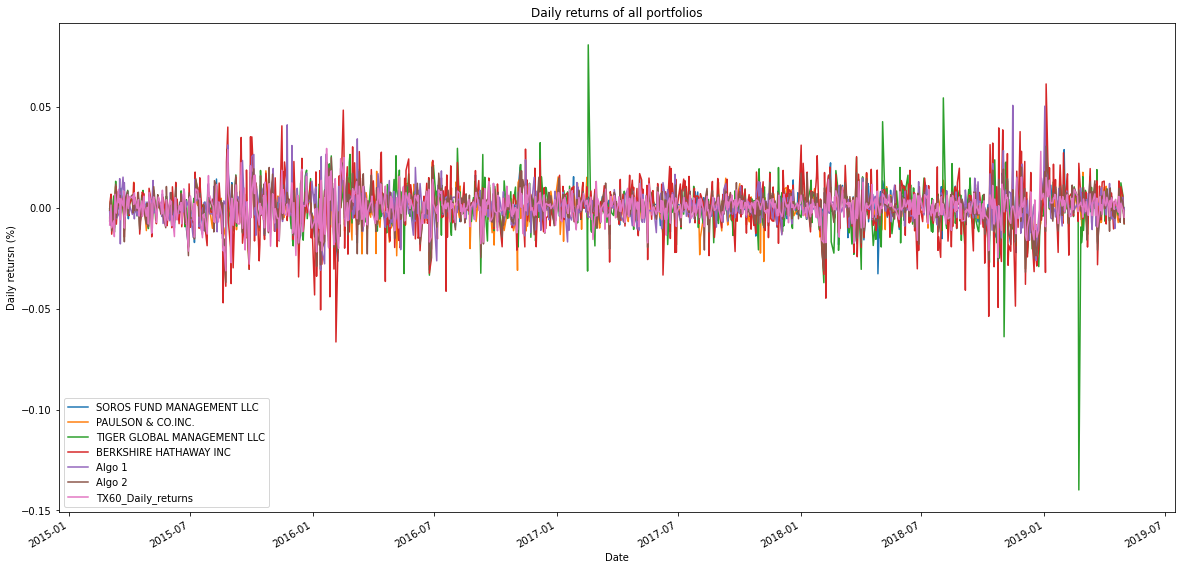

In [44]:
# Plot daily returns of all portfolios
ax = combined_returns.plot(figsize = (20,10), title = "Daily returns of all portfolios")
ax.set_xlabel("Date")
ax.set_ylabel("Daily retursn (%)")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns for all portfolios'}, xlabel='Date', ylabel='Cumulative Returns (%)'>

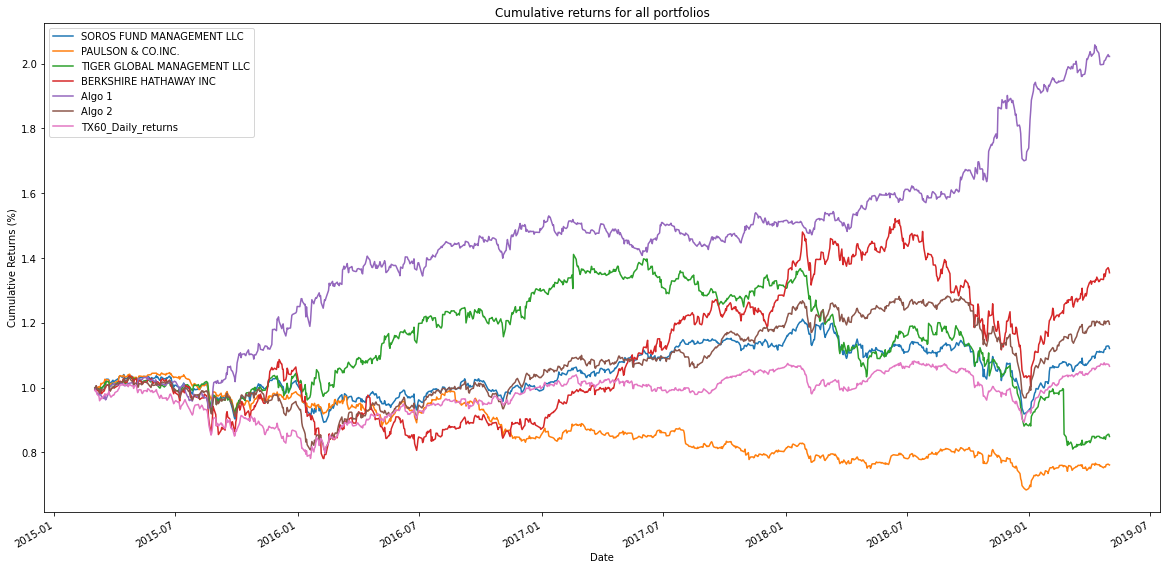

In [45]:
# Calculate cumulative returns of all portfolios
cumulative_ret = (combined_returns + 1).cumprod()
cumulative_ret
# Plot cumulative returns
cumulative_ret.plot(figsize = (20,10), title = "Cumulative returns for all portfolios", ylabel="Cumulative Returns (%)")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Combined returns box plot'}, ylabel='Combined returns in %'>

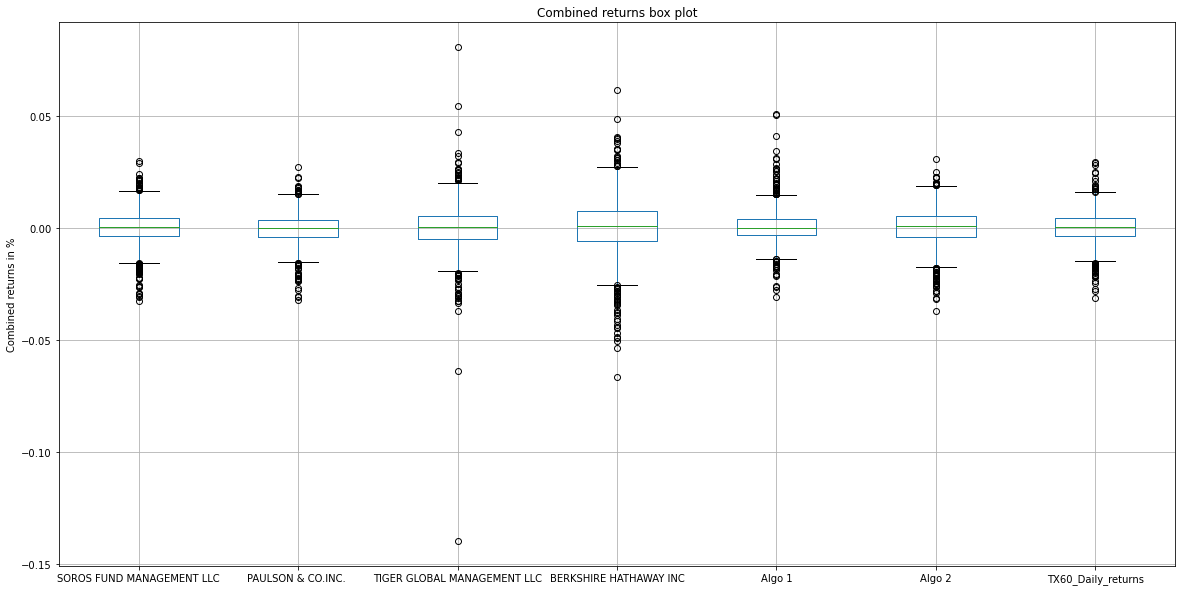

In [46]:
# Box plot to visually show risk
ax2 = combined_returns.boxplot(figsize = (20,10))
ax2.set_title("Combined returns box plot")
ax2.set_ylabel("Combined returns in %")

ax2

### Calculate Standard Deviations

In [47]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TX60_Daily_returns             0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [48]:
# Calculate  the daily standard deviation of S&P TSX 60
combined_returns["TX60_Daily_returns"].std()

# Determine which portfolios are riskier than the S&P TSX 60
combined_returns.std() > combined_returns["TX60_Daily_returns"].std()

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
TX60_Daily_returns             False
dtype: bool

Therefore, SOROS MANAGEMENT LLC, TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1 and Algo 2 are higher risk than TSX 60

### Calculate the Annualized Standard Deviation

In [49]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [50]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TX60_Daily_returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


Text(0, 0.5, 'Rolling standard deviation in %')

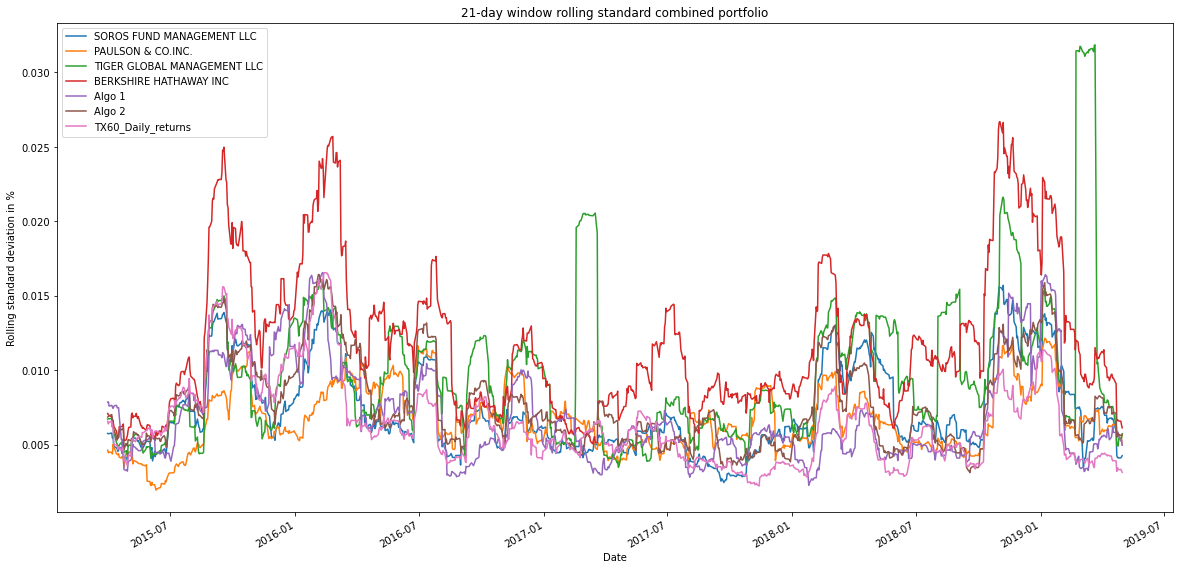

In [51]:
# Plot the rolling standard deviation
ax3 = rolling_std = combined_returns.rolling(window=21).std().plot(figsize = (20,10), title = "21-day window rolling standard combined portfolio")
ax3.set_ylabel("Rolling standard deviation in %")

### Calculate and plot the correlation

In [52]:
# Calculate the correlation
combined_correlation = combined_returns.corr()
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TX60_Daily_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TX60_Daily_returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

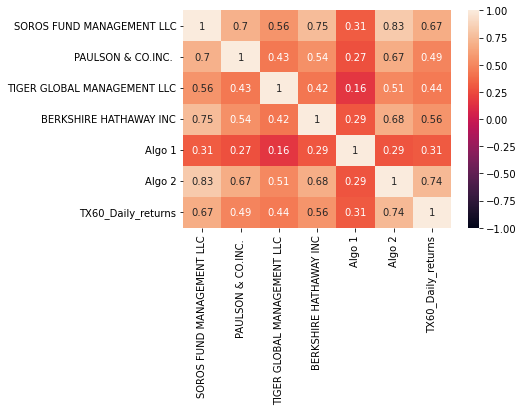

In [53]:
# Display de correlation matrix

sns.heatmap(combined_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Text(0, 0.5, 'Beta in %')

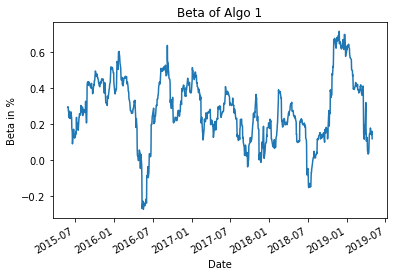

In [54]:
# Calculate covariance of a single portfolio
covariance = combined_returns['Algo 1'].rolling(60).cov(combined_returns['TX60_Daily_returns'])
covariance

# Calculate variance of S&P TSX
variance = combined_returns['TX60_Daily_returns'].rolling(60).var()
variance

# Computing beta
algo1_beta = covariance / variance
algo1_beta

# Plot beta trend
algoplot = algo1_beta.plot()
algoplot.set_title("Beta of Algo 1")
algoplot.set_ylabel("Beta in %")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [55]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TX60_Daily_returns             0.195550
dtype: float64

Text(0, 0.5, ' Sharpe ratios %')

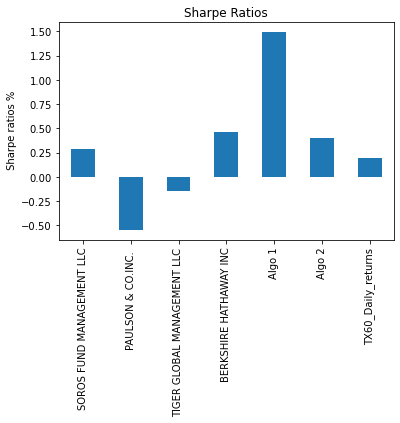

In [57]:
# Visualize the sharpe ratios as a bar plot
ay = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
ay.set_ylabel(" Sharpe ratios %")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

In both cases algorithimic strategies outperform the S&P 500, however algorithimc stragety 2 failed to outperform Berkshire Hathaway INC.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [58]:
# Reading data from 1st stock

tsla_path = Path("../stockdata/tsla.csv")
tsla = pd.read_csv(tsla_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
tsla = tsla.sort_index()
tsla.rename(columns={'Close': 'TSLA'}, inplace=True)

tsla.head(10)

,TSLA
Date,
2015-03-03,39.91
2015-03-04,40.49
2015-03-05,40.13
2015-03-06,38.78
2015-03-09,38.18
2015-03-10,38.06
2015-03-11,38.75
2015-03-12,38.21
2015-03-13,37.74


In [59]:
# Reading data from 2nd stock

aapl_path = Path("../stockdata/aapl.csv")
aapl = pd.read_csv(aapl_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
aapl = aapl.sort_index()
aapl.rename(columns={'Close': 'AAPL'}, inplace=True)
aapl.head(10)

,AAPL
Date,
2015-03-03,32.34
2015-03-04,32.14
2015-03-05,31.60
2015-03-06,31.65
2015-03-09,31.79
2015-03-10,31.13
2015-03-11,30.56
2015-03-12,31.11
2015-03-13,30.90


In [60]:
# Reading data from 3rd stock

goog_path = Path("../stockdata/goog.csv")
goog = pd.read_csv(goog_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
goog.rename(columns={'Close': 'GOOG'}, inplace=True)
goog.head(10)

,GOOG
Date,
2015-03-03,572.07
2015-03-04,571.80
2015-03-05,573.75
2015-03-06,566.13
2015-03-09,567.29
2015-03-10,553.49
2015-03-11,549.67
2015-03-12,553.99
2015-03-13,545.82


In [62]:
# Combine all stocks in a single DataFrame

combined_stocks = pd.concat([tsla, aapl, goog], axis="columns", join="inner")
combined_stocks

,TSLA,AAPL,GOOG
Date,,,
2015-03-03,39.91,32.34,572.07
2015-03-04,40.49,32.14,571.80
2015-03-05,40.13,31.60,573.75
2015-03-06,38.78,31.65,566.13
2015-03-09,38.18,31.79,567.29
...,...,...,...
2019-04-25,49.53,51.32,1263.45
2019-04-26,47.03,51.08,1272.18
2019-04-29,48.29,51.15,1287.58


In [63]:
# Reset Date index
resetcombined_stocks= combined_stocks.reset_index()
resetcombined_stocks

,Date,TSLA,AAPL,GOOG
0,2015-03-03,39.91,32.34,572.07
1,2015-03-04,40.49,32.14,571.80
2,2015-03-05,40.13,31.60,573.75
3,2015-03-06,38.78,31.65,566.13
4,2015-03-09,38.18,31.79,567.29
...,...,...,...,...
1044,2019-04-25,49.53,51.32,1263.45
1045,2019-04-26,47.03,51.08,1272.18
1046,2019-04-29,48.29,51.15,1287.58
1047,2019-04-30,47.74,50.17,1188.48


In [64]:
# Reorganize portfolio data by having a column per symbol
resetcombined_stocks

,Date,TSLA,AAPL,GOOG
0,2015-03-03,39.91,32.34,572.07
1,2015-03-04,40.49,32.14,571.80
2,2015-03-05,40.13,31.60,573.75
3,2015-03-06,38.78,31.65,566.13
4,2015-03-09,38.18,31.79,567.29
...,...,...,...,...
1044,2019-04-25,49.53,51.32,1263.45
1045,2019-04-26,47.03,51.08,1272.18
1046,2019-04-29,48.29,51.15,1287.58
1047,2019-04-30,47.74,50.17,1188.48


In [65]:
# Calculate daily returns
combined_stocks_returns = combined_stocks.pct_change()
combined_stocks_returns.head()

# Drop NAs
combined_stocks_returns.dropna(inplace=True)

# Display sample data
combined_stocks_returns.head()

,TSLA,AAPL,GOOG
Date,,,
2015-03-04,0.014533,-0.006184,-0.000472
2015-03-05,-0.008891,-0.016801,0.003410
2015-03-06,-0.033641,0.001582,-0.013281
2015-03-09,-0.015472,0.004423,0.002049
2015-03-10,-0.003143,-0.020761,-0.024326


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [66]:
# Set weights
weights = [1/3, 1/3, 1/3]
tsla_weight = 1/3
aapl_weight = 1/3
goog_weight = 1/3

# Calculate portfolio return
portfolio_returns = (tsla_weight * combined_stocks_returns["TSLA"]) + (aapl_weight * combined_stocks_returns["AAPL"]) + (goog_weight * combined_stocks_returns["GOOG"])

# Display sample data
portfolio_returns.head()

Date
2015-03-04    0.002625
2015-03-05   -0.007427
2015-03-06   -0.015113
2015-03-09   -0.003000
2015-03-10   -0.016077
dtype: float64

In [67]:
portfolio_returns = pd.DataFrame(portfolio_returns)
portfolio_returns.columns =['portfolio_custom']
portfolio_returns

,portfolio_custom
Date,
2015-03-04,0.002625
2015-03-05,-0.007427
2015-03-06,-0.015113
2015-03-09,-0.003000
2015-03-10,-0.016077
...,...
2019-04-25,-0.015224
2019-04-26,-0.016080
2019-04-29,0.013422


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [68]:
# Join your returns DataFrame to the original returns DataFrame
combined_stocks_custom = pd.concat([combined_returns, portfolio_returns], axis="columns", join="inner")
combined_stocks_custom

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TX60_Daily_returns,portfolio_custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.002625
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.007427
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.015113
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.003000
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.016077
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.015224
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.016080
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.013422


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_stocks_custom.dropna(inplace=True)
combined_stocks_custom

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TX60_Daily_returns,portfolio_custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.002625
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.007427
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.015113
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.003000
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.016077
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.015224
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.016080
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.013422


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized `std`
annualized_std = combined_stocks_custom.std() * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124317
PAULSON & CO.INC.              0.110870
TIGER GLOBAL MANAGEMENT LLC    0.172843
BERKSHIRE HATHAWAY INC         0.203669
Algo 1                         0.120521
dtype: float64

### Calculate and plot rolling `std` with 21-day window

Text(0.5, 0, 'standard deviation')

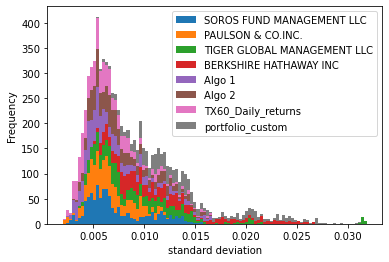

In [71]:
# Calculate rolling standard deviation
rolling_std_custom = combined_stocks_custom.rolling(window=21).std()

# Plot rolling standard deviation
std_plot = rolling_std_custom.plot.hist(stacked=True, bins=100)
std_plot.set_xlabel("standard deviation")

### Calculate and plot the correlation

<AxesSubplot:>

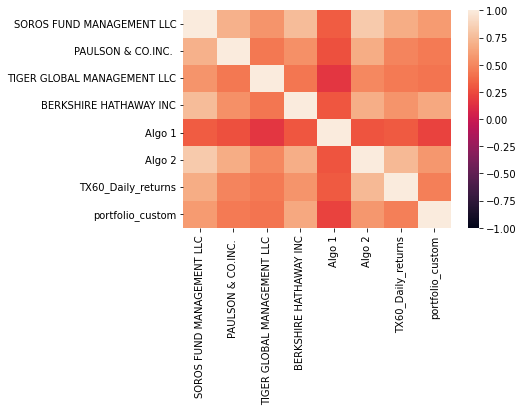

In [72]:
# Calculate and plot the correlation
custom_corr = combined_stocks_custom.corr()
sns.heatmap(custom_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of MSFT'}, xlabel='Date'>

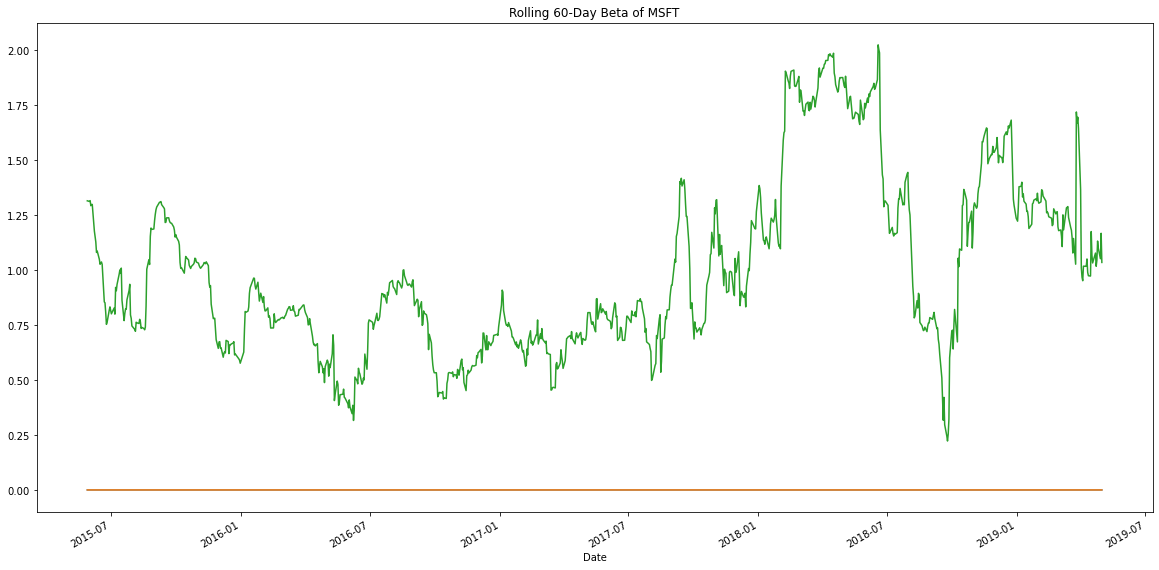

In [82]:
# Calculate and plot Beta
rolling_covariance = combined_stocks_custom['portfolio_custom'].rolling(window=60).cov(combined_stocks_custom['TX60_Daily_returns'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of CUSTOM Returns vs. TX60 Returns')


rolling_variance = combined_stocks_custom['TX60_Daily_returns'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 60TX Returns')

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of custom portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [84]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = (combined_stocks_custom.mean() * 252) / (combined_stocks_custom.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.289348
PAULSON & CO.INC.             -0.536971
TIGER GLOBAL MANAGEMENT LLC   -0.143823
BERKSHIRE HATHAWAY INC         0.475245
Algo 1                         1.496278
Algo 2                         0.398774
TX60_Daily_returns             0.214519
portfolio_custom               0.642420
dtype: float64

Text(0, 0.5, ' Sharpe ratios %')

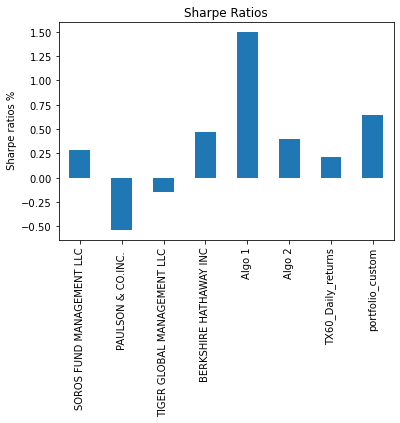

In [85]:
# Visualize the sharpe ratios as a bar plot
az = sharpe_ratios2.plot(kind="bar", title="Sharpe Ratios")
az.set_ylabel(" Sharpe ratios %")

### How does your portfolio do?

Write your answer here!

My custom portfolio is better than the TX60, all of the whale accounts, algo 2 but not algo 1.